In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

C:\Users\vandana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\vandana\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\vandana\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and i

In [2]:
df=pd.read_csv("C:/Users/vandana/Desktop/Loan Prediction Analysis.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df["ApplicantIncome"].nlargest(20)

409    81000
333    63337
171    51763
155    39999
185    39147
443    37719
183    33846
126    23803
506    20833
284    20667
308    20233
130    20166
369    19730
561    19484
487    18333
534    18165
525    17500
493    17263
467    16692
478    16667
Name: ApplicantIncome, dtype: int64

In [5]:
df["ApplicantIncome"].nsmallest(20)

216     150
468     210
600     416
500     645
188     674
77     1000
418    1025
530    1025
14     1299
82     1378
28     1442
399    1500
147    1538
417    1600
303    1625
250    1668
99     1759
578    1782
41     1800
300    1800
Name: ApplicantIncome, dtype: int64

In [6]:
df.loc[0:2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
df[df["ApplicantIncome"] >=80000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [8]:
df.query('ApplicantIncome < 1000 & LoanAmount < 360.0')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [9]:
df[0:9]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [10]:
#CoapplicantIncome(spouse income of the particular id person)
#credit history represents that whether they completed or didn't completed 
#the loan before:where 1.0 represents clear and 0 represents nob 

In [11]:
df.shape #rows and columns

(614, 13)

In [12]:
#statistical message only for numerical values
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#handling missing values in each column

In [14]:
df.isnull().sum()  #no of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#dropping missing values
data=df.dropna()

In [16]:
#checking again the missing values present or not
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#label encoding


In [18]:
data.loc[data['Loan_Status']=='N','Loan_Status',]=0
data.loc[data['Loan_Status']=='Y','Loan_Status',]=1

C:\Users\vandana\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
#checking whether they are replaced or not
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
data['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [22]:
#want to change 3+ values with 4 as it may be anything i dont want any +,- 
data1=data.replace(to_replace='3+',value=4)

In [23]:
data1['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [24]:
data1['Loan_Status'].value_counts(normalize=True)

1    0.691667
0    0.308333
Name: Loan_Status, dtype: float64

In [25]:
data1["ApplicantIncome"].between(12000,17000)

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: ApplicantIncome, Length: 480, dtype: bool

In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
df.shape

(614, 13)

In [29]:
df.head(n=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df.head(n=-10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y


In [31]:
df.describe(include=None,exclude=None)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
df.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [33]:
df.describe(exclude=[object])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [34]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
type(df["Loan_Status"])

pandas.core.series.Series

In [37]:
df["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [38]:
df.iloc[[0,2],[0,3]]

,Loan_ID,Dependents
0,LP001002,0
2,LP001005,0


In [39]:
df.iloc[609,1]

'Female'

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
df.loc[613]

Loan_ID               LP002990
Gender                  Female
Married                     No
Dependents                   0
Education             Graduate
Self_Employed              Yes
ApplicantIncome           4583
CoapplicantIncome          0.0
LoanAmount               133.0
Loan_Amount_Term         360.0
Credit_History             0.0
Property_Area        Semiurban
Loan_Status                  N
Name: 613, dtype: object

In [42]:
df.loc[[613,1],['Loan_ID','LoanAmount']]

,Loan_ID,LoanAmount
613,LP002990,133.0
1,LP001003,128.0


In [43]:
df.loc[1,'LoanAmount']

128.0

In [44]:
df[0:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [45]:
df[["Loan_ID",'LoanAmount']]

,Loan_ID,LoanAmount
0,LP001002,NaN
1,LP001003,128.0
2,LP001005,66.0
3,LP001006,120.0
4,LP001008,141.0
...,...,...
609,LP002978,71.0
610,LP002979,40.0
611,LP002983,253.0
612,LP002984,187.0


In [46]:
df.at[1,'LoanAmount'] = 68.5
df.at[1,'LoanAmount']

68.5

In [47]:
df[1:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,68.5,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [48]:
df.iloc[1,0:3]

Loan_ID    LP001003
Gender         Male
Married         Yes
Name: 1, dtype: object

In [49]:
df.iloc[1:2,0:3]

,Loan_ID,Gender,Married
1,LP001003,Male,Yes


In [50]:
df.loc[1:5,'Loan_ID']

1    LP001003
2    LP001005
3    LP001006
4    LP001008
5    LP001011
Name: Loan_ID, dtype: object

In [51]:
df.loc[1:10,'Loan_ID':'LoanAmount']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,68.5
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0


In [52]:
#data visualization :relationship b/t various colums and easy way to analyse

In [53]:
#education and loan_status

In [54]:
#sns choices for plot style and color defaults.it was statistical graphics and it was closely
#integrated with the pandas dataframes which
#helps in understanding the data

In [55]:
#ridge is used to reduce the complexity of model
#it is most suitable when a data set contains a higher number of predictor variables than the
#number of observations

In [56]:
#countplot shows the counts of observations in each categorical bin using bars
#count,joint,dislot,rel,pair

In [57]:
#hue determines which column in dataframe should be used for colour encoding

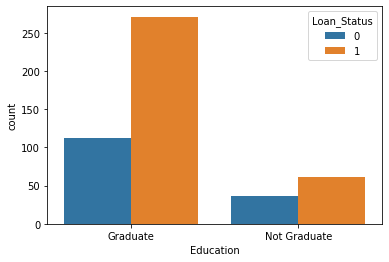

In [58]:
sns.countplot(x='Education',hue='Loan_Status',data=data1)
#it was used to show the counts of observations in each categorical bin using bars

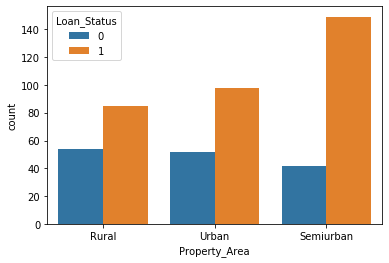

In [59]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data1)


ValueError: could not convert string to float: 'LP001003'

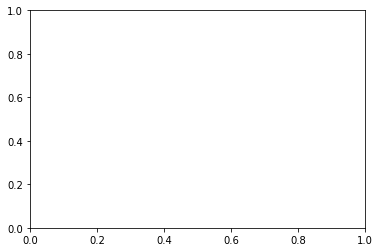

In [60]:
sns.kdeplot(x='CoapplicantIncome',hue='Loan_Status',data=data1)

In [ ]:
sns.displot(x='Married',hue='Loan_Status',data=data1)

In [ ]:

sns.kdeplot(x='ApplicantIncome',hue="Loan_Status",data=data1)

In [ ]:
#converting categorical values into numerical values
data=data1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

In [ ]:
#loan_amount represents the loan amount in thousands.an assumption is if loan amount is higher probability of repaying would be lesser 
#loan_amount_term represnets the number of months required to repay the loan

In [ ]:
x=org_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=org_data['Loan_Status']

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
a=df['ApplicantIncome'].between(1220,4200,inclusive=True)
a
df['ApplicantIncome'].value_counts()

In [ ]:
#training & testing
#splitting equal no of zeroes in both x and y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:

print(x.shape,x_train.shape,x_test.shape)

In [ ]:
#training the model using support vector machine
#svm:how close the traing points are close to hyperplane

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the svm model
classifier.fit(x_train,y_train)

In [ ]:
#accracy score

In [ ]:
x_train_pred=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [ ]:
print("Accuracy of training data:",training_data_accuracy)

In [ ]:
x_test_pred=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [ ]:
print("Accuracy of testing data:",testing_data_accuracy)

In [ ]:
x.ndim

In [ ]:
y.ndim

In [ ]:
#mismatched=np.where(y_test!=x_test_pred)

In [ ]:
#mismatched

In [ ]:
#print(y_test[2],x_test_pred[2])

In [ ]:
#between=df.loc(df["CoapplicantIncome"].between(120.0,170.0))

In [ ]:
#making predictions

In [ ]:
input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]

In [ ]:
pred=classifier.predict(input)

In [ ]:
pred

In [ ]:
input=[[0,0, 0, 1, 1, 4583 ,0.0,133.0,360.0,0.0 ,1]]

In [ ]:
pred=classifier.predict(input)

In [ ]:
pred

In [ ]:
#new datapoint
input=[[1,0,0,1,1,5000,0.0,123.0,180.0,1.0,2]]

In [ ]:
pred=classifier.predict(input)

In [ ]:
pred

In [ ]:
#nearly identical performance on training set and test set is good outcome,
#means model is doing what its supposed to do.

In [ ]:
#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [ ]:
print("Accuracy of training data:",training_data_accuracy)

In [ ]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [ ]:
print("Accuracy of testing data:",testing_data_accuracy)

In [ ]:


input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]
pred=model.predict(input)
pred

In [ ]:
#decisontree claasifer

In [ ]:
#from sklearn.preprocessing import StandardScaler
#st_x=StandardScaler()

In [ ]:
#x_train=st_x.fit_transform(x_train)
#x_test=st_x.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifer1=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [ ]:
classifer1.fit(x_train,y_train)

In [ ]:
x_train_pred=classifer1.predict(x_train)

In [ ]:
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [ ]:
training_data_accuracy

In [ ]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [ ]:
testing_data_accuracy

In [ ]:
input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]

In [ ]:
pred=classifer1.predict(input)

In [ ]:
pred

In [ ]:
#ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge=Ridge(alpha=0.2)

In [ ]:
ridge.fit(x_train,y_train)

In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
x_train_pred=classifer1.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)
training_data_accuracy

In [ ]:
x_test_pred=classifer1.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)
testing_data_accuracy

In [ ]:
df=df[0:414]

In [ ]:
df

In [ ]:
data=df.dropna()

In [ ]:
data.isnull().sum()

In [ ]:
data.loc[data['Loan_Status']=='N','Loan_Status',]=0
data.loc[data['Loan_Status']=='Y','Loan_Status',]=1

In [ ]:
data.head()

In [ ]:
data1=data.replace(to_replace='3+',value=4)
data1['Dependents'].value_counts()

In [ ]:
#converting categorical values into numerical values
data=data1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

In [ ]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [ ]:
x

In [ ]:
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [ ]:
training_data_accuracy

In [ ]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [ ]:
testing_data_accuracy

In [ ]:
input=[[1,1,2,1,0,7583,0,187,360,1,2]]
pred=model.predict(input)
pred

In [ ]:
input1=[[1,0,0,1,1,10416,0,187,360,0,2]]
pred=model.predict(input1)
pred

In [ ]:
a=data['ApplicantIncome'].between(1220,4200,inclusive=True)

In [ ]:
a=x_train['ApplicantIncome'].between(1220,4200,inclusive=True)

In [ ]:
a

In [ ]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very']
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')